# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
!python --version

Python 3.6.1 :: Anaconda custom (x86_64)


In [4]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
list((timeit.timeit('range(%d)' % num) for num in vals))

[0.3571677740001178,
 0.35485517800043453,
 0.35974234499917657,
 0.30338345100062725,
 0.2976740600006451,
 0.32395762399937666]

---

# Plot Functions

In [5]:
def my_plot1(vals, slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    plt.plot(np.log10(vals), slow_times);
    plt.plot(np.log10(vals), fast_times);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend(['slow', 'fast'])

In [6]:
def my_plot2(slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, sc, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, fc, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), ('slow', 'fast') );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [7]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
3.37 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
32.2 µs ± 6.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
339 µs ± 9.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.62 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
28.9 ms ± 496 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
287 ms ± 3.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Better
1.57 µs ± 63 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
12 µs ± 736 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
119 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.24 ms ± 62.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.4 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
117 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [9]:
sc = slow_collection()
fc = fast_collection()

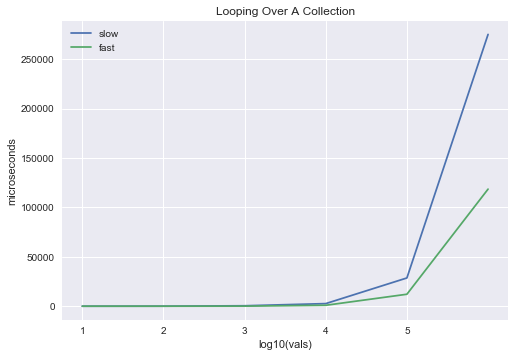

In [10]:
my_plot1(vals, sc, fc, 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="microseconds")

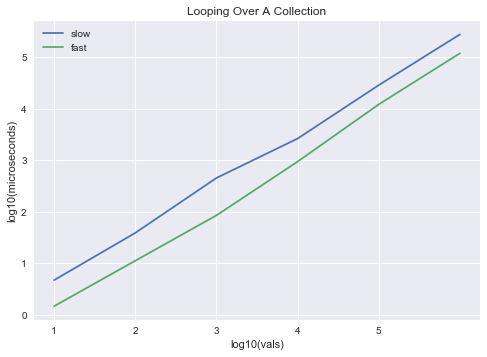

In [11]:
my_plot1(vals, np.log10(sc), np.log10(fc), 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

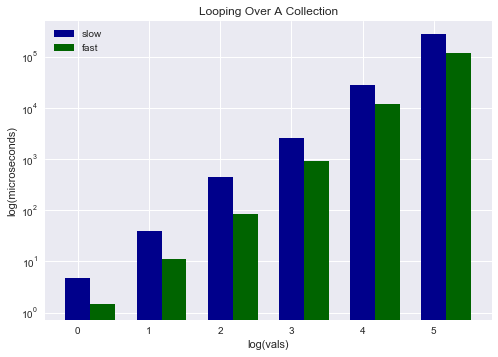

In [12]:
my_plot2(sc, fc, title="Looping Over A Collection", 
         xlabel='log(vals)', 
         ylabel="log(microseconds)")

---

# Sorting Lists

In [13]:
# LEGACY CODE

# Sorting lists
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors)-1, -1, -1)]     
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

Bad
3.67 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
29 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
340 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.27 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
35 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
359 ms ± 5.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Better
1.71 µs ± 70 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
12.4 µs ± 625 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
111 µs ± 8.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.12 ms ± 47.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.8 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
126 ms ± 5.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [15]:
ss = slow_sort()
fs = fast_sort()

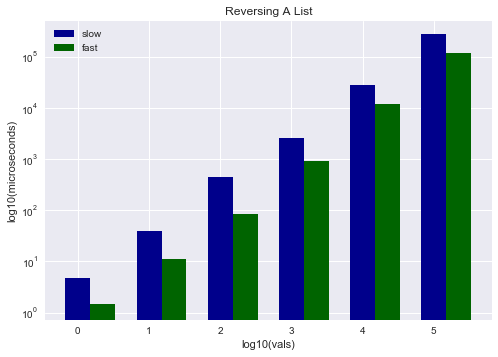

In [16]:
my_plot2(ss, fs, 
        title="Reversing A List", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over A Collection & Indices

In [17]:
# LEGACY CODE

# Looping over a collection and indices
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in range(len(colors))]
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

Bad
5.41 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
46.1 µs ± 4.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
546 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.93 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
79 ms ± 4.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
842 ms ± 68.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Better
4.47 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
51.1 µs ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
635 µs ± 77.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.45 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
94 ms ± 9.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
920 ms ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [19]:
sci = slow_collection_indices()
fci = fast_collection_indices()

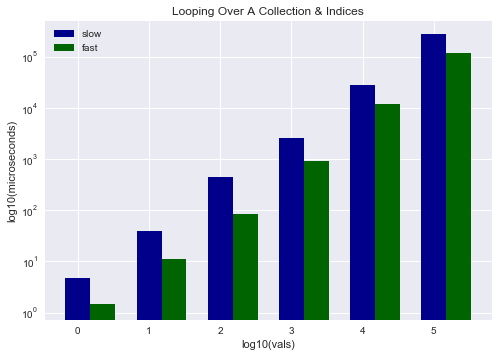

In [20]:
my_plot2(sci, fci, 
        title="Looping Over A Collection & Indices", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over Two Collections

In [21]:
# LEGACY CODE

# Loop over two collections
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in range(min(len(names), len(colors)))]
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

Bad
8.36 µs ± 320 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
64.5 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
730 µs ± 74.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.89 ms ± 767 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
102 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.06 s ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Better
3.65 µs ± 46.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
32.6 µs ± 2.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
343 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.54 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
51.9 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
569 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

# Appending Strings

In [22]:
# LEGACY CODE

# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\nBetter')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

Bad
CPU times: user 97 µs, sys: 0 ns, total: 97 µs
Wall time: 102 µs
CPU times: user 970 µs, sys: 3 µs, total: 973 µs
Wall time: 985 µs
CPU times: user 8.77 ms, sys: 117 µs, total: 8.89 ms
Wall time: 9.05 ms
CPU times: user 77.6 ms, sys: 2.31 ms, total: 79.9 ms
Wall time: 79 ms
CPU times: user 725 ms, sys: 6.64 ms, total: 732 ms
Wall time: 736 ms
CPU times: user 7.14 s, sys: 61.5 ms, total: 7.2 s
Wall time: 7.27 s

Better
CPU times: user 27 µs, sys: 3.48 ms, total: 3.51 ms
Wall time: 3.51 ms
CPU times: user 91 µs, sys: 1 µs, total: 92 µs
Wall time: 93.9 µs
CPU times: user 753 µs, sys: 4 µs, total: 757 µs
Wall time: 760 µs
CPU times: user 7.44 ms, sys: 777 µs, total: 8.22 ms
Wall time: 8.2 ms
CPU times: user 94.6 ms, sys: 18.2 ms, total: 113 ms
Wall time: 113 ms
CPU times: user 959 ms, sys: 194 ms, total: 1.15 s
Wall time: 1.17 s


---

# Using Standard Library

In [23]:
# Standard Library (Wow!)

for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit [newlist.append(np.cumsum(item)) for item in range(val)]
    else:
        print('\nBetter')
        newlist = []
        for val in vals:
            %timeit newlist = map(np.cumsum, range(val))

Bad
78.9 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
761 µs ± 88.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.39 ms ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
65.6 ms ± 4.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
713 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.79 s ± 1.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

Better
719 ns ± 31.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
631 ns ± 62 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
670 ns ± 49.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
708 ns ± 74.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
631 ns ± 49.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
611 ns ± 16.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


---

# Listexp vs Genexp

In [24]:
# listexp vs genexp

for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)] # list expression
    else:
        print('\nBetter')
        for val in vals:
            %timeit (np.cumsum(item) for item in range(val)) # generator expression

Bad
64 µs ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
686 µs ± 133 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.04 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
64.1 ms ± 5.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
659 ms ± 81.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.63 s ± 320 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Better
652 ns ± 22 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
740 ns ± 139 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
691 ns ± 5.42 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
685 ns ± 5.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
691 ns ± 9.28 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
691 ns ± 9.94 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


---

# Dots

In [25]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
2.55 µs ± 53.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.52 µs ± 33.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.51 µs ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.52 µs ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.54 µs ± 46.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.55 µs ± 47.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Better
2.53 µs ± 67.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.5 µs ± 46.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.48 µs ± 27.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.5 µs ± 59.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.46 µs ± 30.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.54 µs ± 58 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)